In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_regression, chi2, SelectFromModel
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [2]:
data = pd.read_csv('data_i.csv')
data.columns

Index(['Netflows', 'p1_d', 'p2_d', 'p3_d', 'duration', 'max_d', 'min_d',
       '#packets', 'Avg_bps', 'Avg_pps', 'Avg_bpp', '#Bytes', '#sp', '#dp',
       'first_sp', 'first_dp', 'p1_ip', 'p2_ip', 'p3_ip', 'p1_ib', 'p2_ib',
       'p3_ib', 'second_sp', 'second_dp', 'third_sp', 'third_dp',
       'First_Protocol_ICMP', 'First_Protocol_ICMP6', 'First_Protocol_TCP',
       'First_Protocol_UDP', 'Type_mine', 'Type_not_mine',
       'Cryptocurrency_Bitcash', 'Cryptocurrency_Bitcoin',
       'Cryptocurrency_Does not have', 'Cryptocurrency_Etherium',
       'Cryptocurrency_Litecoin', 'Cryptocurrency_Monero'],
      dtype='object')

Anova, chi2, forward selection, backward selection, Recursive Feature Elimination, Lasso, Ridge

In [3]:
y = data['Type_mine']
X = data.drop(['Type_mine','Type_not_mine'], axis = 1)

# ANOVA F-value For Feature Selection Data Pure

In [4]:
f_value = SelectKBest(f_classif)
X_best = f_value.fit(X,y)

C:\Users\S T E V E N\AppData\Roaming\Python\Python37\site-packages\sklearn\feature_selection\_univariate_selection.py:115: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw


(array([-500.,    0.,  500., 1000., 1500., 2000., 2500., 3000., 3500.,
        4000., 4500.]), <a list of 11 Text yticklabel objects>)

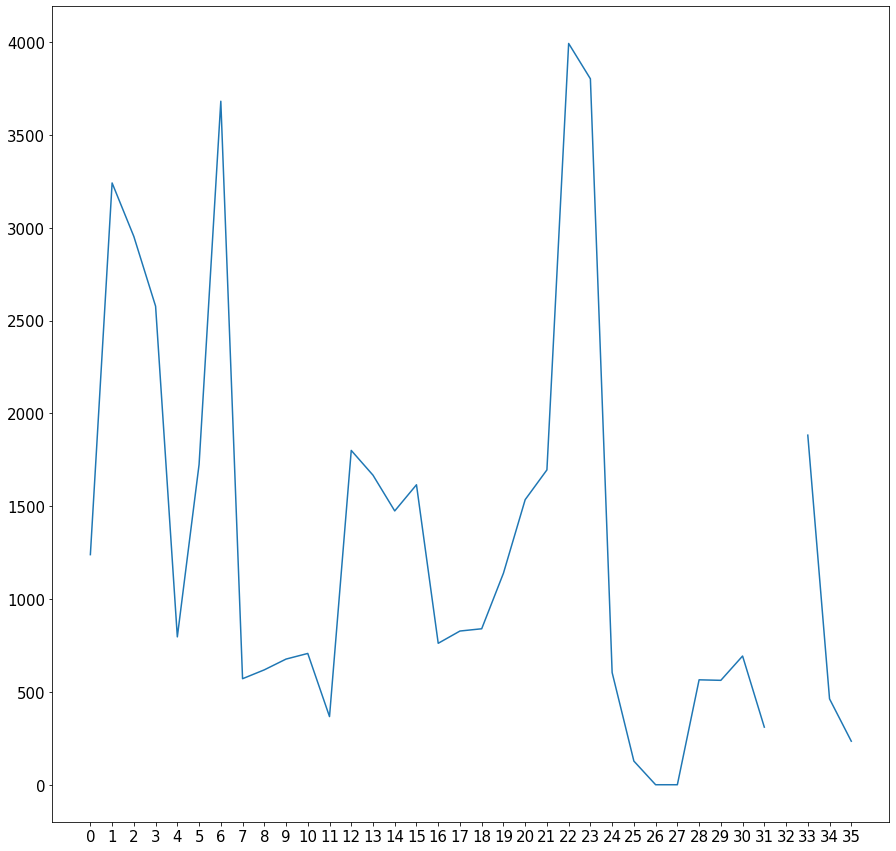

In [5]:
fig, ax = plt.subplots(figsize = (15,15))
scores = X_best.scores_
ax = plt.rcParams["figure.figsize"] = [24,18]
ax = plt.plot(scores)
plt.xticks(np.arange(36),np.arange(36), size = 15 )
plt.yticks(size = 15)

In [6]:
best_features = [1,2,3,6,12,15,20,22,23,33]

In [7]:
temp = data.columns
temp[best_features]

Index(['p1_d', 'p2_d', 'p3_d', 'min_d', '#sp', 'first_dp', 'p2_ib',
       'second_sp', 'second_dp', 'Cryptocurrency_Bitcoin'],
      dtype='object')

# ExtraTreesClassifier Data Pure

In [8]:
clf = ExtraTreesClassifier(n_estimators = 36)
clf = clf.fit(X,y)
model = SelectFromModel(clf, prefit=True)

In [9]:
X[X.columns[model.get_support(indices = True)]].columns

Index(['p1_d', 'p2_d', 'min_d', 'first_sp', 'first_dp', 'second_sp',
       'second_dp', 'Cryptocurrency_Does not have', 'Cryptocurrency_Etherium'],
      dtype='object')

# LDA Data Pure

In [10]:
lda = LinearDiscriminantAnalysis(n_components=None)

In [11]:
X_lda = lda.fit(X, y)
X_lda

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [12]:
model = SelectFromModel(X_lda, prefit=True)
X[X.columns[model.get_support(indices = True)]].columns

Index(['min_d', '#sp', '#dp', 'first_dp', 'p1_ip', 'p2_ib', 'p3_ib',
       'second_sp', 'second_dp', 'First_Protocol_ICMP6', 'First_Protocol_TCP',
       'First_Protocol_UDP', 'Cryptocurrency_Bitcoin',
       'Cryptocurrency_Monero'],
      dtype='object')

In [13]:
feature_selection = ['p1_d', 'p2_d','min_d','#sp','#dp','first_sp', 'first_dp', 'second_sp','second_dp']

# Data No Pure

In [19]:
data_n = pd.read_csv('data_n.csv')
data_n.head()

,Netflows,p1_d,p2_d,p3_d,duration,max_d,min_d,#packets,Avg_bps,Avg_pps,...,p2_ib,p3_ib,First_Protocol_ICMP,First_Protocol_ICMP6,First_Protocol_TCP,First_Protocol_UDP,Type_mine,Type_not_mine,Cryptocurrency_Does not have,Cryptocurrency_Unidentified
0,-0.068270,-0.113543,-0.010393,7.217647,0.625656,1.820783,-0.019289,-0.105903,-0.119549,-0.12207,...,1.529355,0.573387,0,0,0,1,1,0,0,1
1,-0.035267,-0.113543,-0.156304,-0.245901,-0.298867,-0.911623,-0.019289,-0.128811,-0.120638,-0.12207,...,-0.183757,-0.273766,0,1,0,0,1,0,0,1
2,-0.065270,-0.113543,-0.156304,-0.245901,-0.118159,0.388828,-0.019289,-0.122899,-0.119561,-0.12207,...,-0.169115,-0.003575,0,1,0,0,1,0,0,1
3,-0.035267,-0.113543,-0.156304,-0.245901,0.036907,1.542304,-0.019289,-0.106272,-0.119561,-0.12207,...,-0.183757,-0.240393,0,1,0,0,1,0,0,1
4,-0.029267,-0.113543,-0.156304,-0.245901,0.056333,1.642519,-0.019289,-0.111815,-0.120117,-0.12207,...,-0.183757,-0.268952,0,1,0,0,1,0,0,1


In [20]:
y = data_n['Type_mine']
X = data_n.drop(['Type_mine','Type_not_mine'], axis = 1)

# ANOVA F-value For Feature Selection Data No Pure

In [21]:
f_value = SelectKBest(f_classif)
X_best = f_value.fit(X,y)

C:\Users\S T E V E N\AppData\Roaming\Python\Python37\site-packages\sklearn\feature_selection\_univariate_selection.py:115: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw


(array([-20000.,      0.,  20000.,  40000.,  60000.,  80000., 100000.,
        120000., 140000.]), <a list of 9 Text yticklabel objects>)

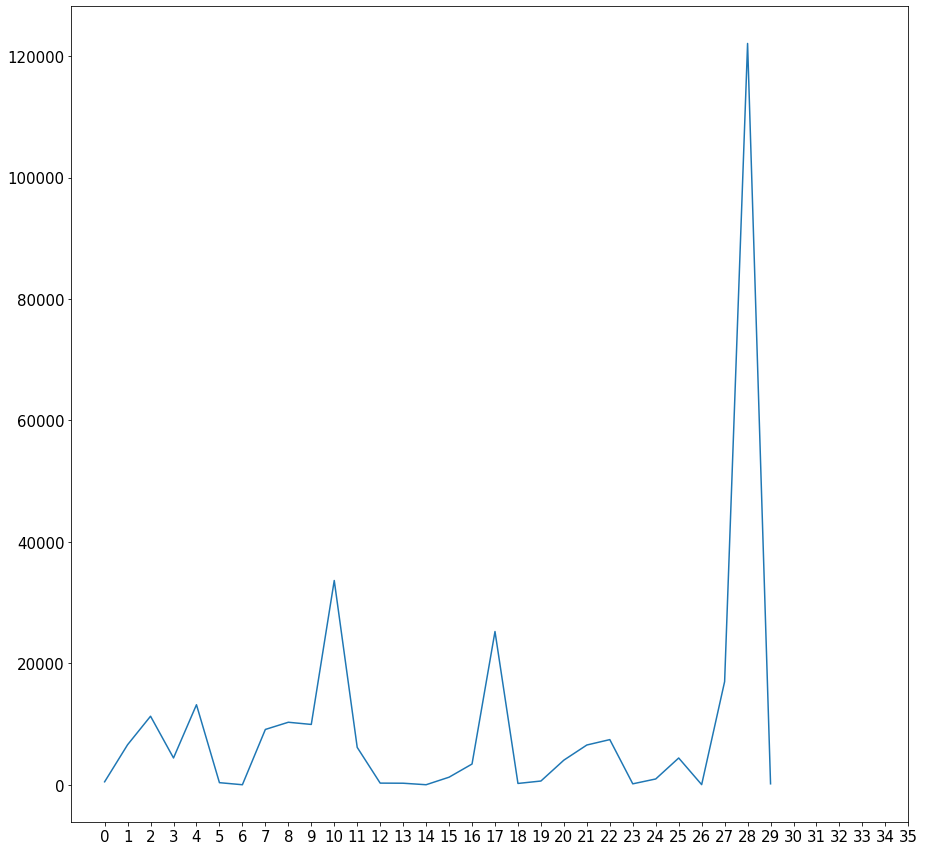

In [30]:
fig, ax = plt.subplots(figsize = (15,15))
scores = X_best.scores_
ax = plt.rcParams["figure.figsize"] = [24,18]
ax = plt.plot(scores)
plt.xticks(np.arange(36),np.arange(36), size = 15 )
plt.yticks(size = 15)

In [31]:
best_features = [2,4,8,9,10,17,28]

In [32]:
temp = data.columns
temp[best_features]

Index(['p2_d', 'duration', 'Avg_bps', 'Avg_pps', 'Avg_bpp', 'p2_ip',
       'First_Protocol_TCP'],
      dtype='object')

# ExtraTreesClassifier Data no Pure

In [24]:
clf = ExtraTreesClassifier(n_estimators = 36)
clf = clf.fit(X,y)
model = SelectFromModel(clf, prefit=True)

In [25]:
X[X.columns[model.get_support(indices = True)]].columns

Index(['first_dp', 'First_Protocol_TCP', 'Cryptocurrency_Does not have',
       'Cryptocurrency_Unidentified'],
      dtype='object')

# LDA Data no Pure

In [26]:
lda = LinearDiscriminantAnalysis(n_components=None)

In [27]:
X_lda = lda.fit(X, y)
X_lda

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [28]:
model = SelectFromModel(X_lda, prefit=True)
X[X.columns[model.get_support(indices = True)]].columns

Index(['#sp', '#dp', 'first_dp', 'First_Protocol_ICMP', 'First_Protocol_TCP'], dtype='object')

In [1]:
feature_selection_no_puros = ['#sp', '#dp','duration','first_dp','Avg_bps', 'Avg_pps', 'Avg_bpp','p2_ip', 'First_Protocol_ICMP', 'First_Protocol_TCP']

In [2]:
feature_selection_puros = ['p1_d', 'p2_d','min_d','#sp','#dp','first_sp', 'first_dp', 'second_sp','second_dp']